# Αριθμητικές λύσεις για κοινούς πολυτροπικούς

Όταν έχουμε κοινούς πολυτροπικούς δείκτες $\Gamma=1$, η σχέση διασποράς γίνεται: 

\begin{align}
& C^2\dfrac{(Φ-M)^2-C^2}{ (Φ-Μ)^4}=\dfrac{Φ^2 -1}{Φ^4} \nonumber\\
& \dfrac{C^2}{ (Φ-Μ)^2}-\dfrac{C^4}{ (Φ-Μ)^4}-\dfrac{1}{Φ^2}+\dfrac{1}{Φ^4}=0\nonumber
\\
& [(\dfrac{1}{Φ^2}-\dfrac{C^2}{(Φ-Μ)^2})(\dfrac{1}{Φ^2}+\dfrac{C^2}{(Φ-Μ)^2})]-(\dfrac{1}{Φ^2}-\dfrac{C^2}{(Φ-Μ)^2})=0
\nonumber\\
& (\dfrac{1}{Φ^2}-\dfrac{C^2}{(Φ-Μ)^2})(\dfrac{1}{Φ^2}+\dfrac{C^2}{(Φ-Μ)^2}-1)=0
\end{align}

Οπότε έχουμε τις εξής περιπτώσεις:
\begin{equation}
(\dfrac{1}{Φ^2}-\dfrac{C^2}{(Φ-Μ)^2})=0 \qquad \text{ή} \qquad (\dfrac{1}{Φ^2}+\dfrac{C^2}{(Φ-Μ)^2}-1)=0
\end{equation}
Λύνουμε την 1η:
\begin{gather}
(Φ-Μ)^2-C^2\Phi^2=0 \nonumber
\\
(1-C^2)\Phi^2-2M\Phi+M^2=0 \nonumber \\
\end{gather}
Με ρίζες $\Phi=\dfrac{M}{1-C},\dfrac{M}{1+C}\in \mathbb{R}$, οπότε δεν προκύπτει αστάθεια. 

Αντίστοιχα η 2η γίνεται:
\begin{align}
& \dfrac{1}{Φ^2}+\dfrac{C^2}{(Φ-Μ)^2}-1=0\nonumber
\\
& (\Phi-M)^2+C^2\Phi^2-\Phi^2(\Phi-M)^2=0\nonumber
\\
& -\Phi^4+2\Phi^3M-\Phi^2M^2+\Phi^2-2\Phi M +M^2+C^2 \Phi	^2=0\nonumber \\
& \Phi^4-2M \Phi^3+(M^2-1-C^2)\Phi^2+2M\Phi-M^2=0
\label{eq:general.quartic}
\end{align}

In [13]:
import sympy as sm
import numpy as np
from sympy import solveset,S
import matplotlib.pyplot as plt
sm.init_printing()

%matplotlib inline

C, gamma, M=sm.symbols('C, \gamma M',real=True)
om,Om,phi=sm.symbols('\omega \Omega \Phi ',complex=True)
a,b,c,d,e,P,D=sm.symbols('a b c d e P D',real=True)

def lyseis(c,m):
    import sympy as sm
    import numpy as np
    
    C, gamma, M=sm.symbols('C, \gamma M',real=True)
    om,Om,phi=sm.symbols('\omega \Omega \Phi ',complex=True)
    sm.init_printing()
    
    dr=phi**4-2*M*phi**3+(M**2-1-C**2)*phi**2+2*M*phi-M**2

    
    dr=dr.subs(C,c)
    dr=dr.subs(M,m)
    eqdr=sm.Eq(dr,0)
    lys=sm.solve(eqdr,phi,domain=sm.S.Complexes)
    lysn=[sm.N(i) for i in lys]
    return lysn    

Ορίσαμε μια συνάρτηση lyseis(c,m) που δέχεται σαν ορίσματα τα $C,M$ και επιστρέφει την τιμή του $\Phi=\dfrac{\omega}{k \cdot c_2}$, τις λύσεις δηλαδή της τεταρτοβάθμιας.

In [14]:
lyseis(0.5,1)

Έχουμε δυο πραγματικές λύσεις,η 1η και η 4η, και δυο συζυγείς μιγαδικές. Η αστάθεια προκύπτει από το μιγαδικό μέρος της $\Phi$ οπότε αυτό και θα εξετάσουμε.

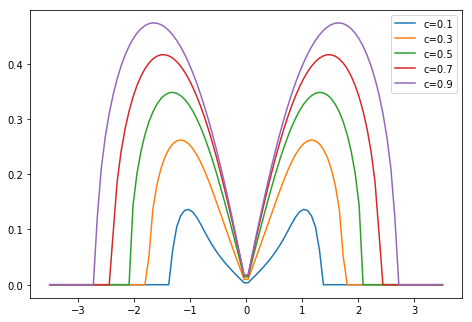

In [17]:
mm=np.linspace(-3.5,3.5,100)
Imphi=np.empty_like(mm)
crange=np.arange(0.1,1,0.2)

fig1=plt.figure()
axes= fig1.add_axes([0,0,1,1])

for c in crange:
    for i in range(len(mm)):
        l=lyseis(c,mm[i])
        imSet=np.array([sm.im(l[i]) for i in range(len(l))])
        
        Imphi[i]=max(imSet)
        
    axes.plot(mm,Imphi,label='c='+str(c))
        
axes.legend()     



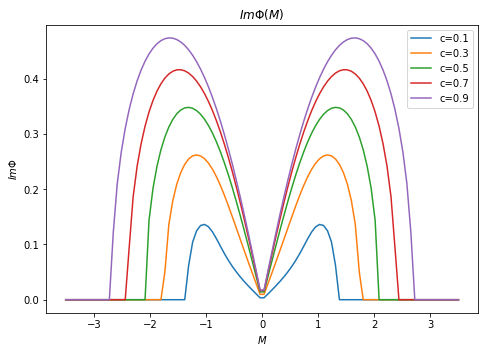

In [25]:
axes.set_xlabel("$M$")
axes.set_ylabel("$Im\Phi$")
axes.set_title("$Im\Phi(M)$")
fig1


Το Imset είναι ένας πίνακας που περιέχει τα 4 φανταστικά μέρη των λύσεων. 
Το Imphi είναι ένας πίνακας ίδιου μήκους με τα $M$ που διαλέγει περιέχει το μέγιστο των λύσεων,έτσι ώστε να διαλέξουμε μόνο τις μιγαδικές λύσεις. (Οι πραγματικές λύσεις εμφανίζονται με φανταστικά μέρη της τάξης $10^{-21}$)